In [2]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
from slab.dsfit import*
from slab import*
import json
from datetime import datetime
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from qutip import *

def coherent_state(n, alpha):
    return exp(-abs(alpha)**2)*abs(alpha)**(2*n)/scipy.special.factorial(n)

def line(x, m, b):
    return m*x+b

def proportional(x, m):
    return m * x

def gfromchi(chi,alpha,delta):
    return sqrt(chi*delta*(delta+alpha)/alpha)

def gaussfuncsum(p, x):
    """p[0]+p[1]/(1+(x-p[2])**2/p[3]**2)"""
    y = 0
    for ii in range(N):
        y = y + p[3*ii+1]*exp(-(x-(p[3*ii+2]))**2/2/p[3*ii+3]**2)
    return y

def gaussfuncsum_with_baseline(p, x):
    """p[0]+p[1]/(1+(x-p[2])**2/p[3]**2)"""
    y = 0
    for ii in range(N):
        y = y + p[3*ii+1]*exp(-(x-(p[3*ii+2]))**2/2/p[3*ii+3]**2)
    y += p[0]
    return y

def fitgausssum(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label="",debug=False):
    """fit lorentzian:
        returns [offset,amplitude,center,hwhm]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:
        fitparams=0*ones(3*N+1)
        fitparams[0]=(fitdatay[0]+fitdatay[-1])/2.
        fitparams[1]=max(fitdatay)-min(fitdatay)
        fitparams[2]=fitdatax[np.argmax(fitdatay)]
        fitparams[3]=(max(fitdatax)-min(fitdatax))/10.
    if debug==True: print(fitparams)
    p1 = fitgeneral(fitdatax, fitdatay, gaussfuncsum, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                    label=label)
    p1[3]=abs(p1[3])
    return p1

def fitgausssum_with_baseline(xdata,ydata,fitparams=None,domain=None,showfit=False,
                              showstartfit=False,label="",debug=False):
    """fit lorentzian:
        returns [offset,amplitude,center,hwhm]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:
        fitparams=0*ones(3*N+1)
        fitparams[0]=(fitdatay[0]+fitdatay[-1])/2.
        fitparams[1]=max(fitdatay)-min(fitdatay)
        fitparams[2]=fitdatax[np.argmax(fitdatay)]
        fitparams[3]=(max(fitdatax)-min(fitdatax))/10.
    if debug==True: print(fitparams)
    p1 = fitgeneral(fitdatax, fitdatay, gaussfuncsum_with_baseline, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                    label=label)
    p1[3]=abs(p1[3])
    return p1

def expfunc2(p,x):
    """p[0]+p[1]*exp(-(x-p[2])/p[3])"""
    return p[0]*math.e**(-(x-p[1])/p[2])

def fitexp2(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
    """Fit exponential decay (p[0]*exp(-(x-p[1])/p[2]))"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:    
        fitparams=[0.,0.,0.,0.]
        fitparams[0]=fitdatay[0]-fitdatay[-1]
        fitparams[1]=fitdatax[0]
        fitparams[2]=(fitdatax[-1]-fitdatax[0])/5.
    #print fitparams
    p1 = fitgeneral(fitdatax, fitdatay, expfunc2, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                    label=label)
    return p1   

def expfunc(x,b,c,d):
    """p[0]*exp(-(x-p[1])/p[2])"""
    return b*math.e**(-(x-c)/d) 

def expfunc_test(x,b,c):
    return b * math.e**(-x/c)

def doublegauss(bins, *p):
    a1, sigma1, mu1 = p[0], p[1], p[2]
    a2, sigma2, mu2 = p[3], p[4], p[5]

    y1 = a1*((1 / (np.sqrt(2 * np.pi) * sigma1)) *
     np.exp(-0.5 * (1 / sigma1 * (bins - mu1))**2))
    y2 = a2*((1 / (np.sqrt(2 * np.pi) * sigma2)) *
     np.exp(-0.5 * (1 / sigma2 * (bins - mu2))**2))
    y = y1+y2
    
    return y
def gaussian2d(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'


C:\Users\slab\Anaconda3\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps.dll'
Could not load labbrick


# 100 MHz IF

In [8]:
path = "C:\\_Lib\python\\slab\\experiments\\qm_opx\\data\\"
filename = path + "00000_histogram_jpa_freq_amp_sweep.h5"
numbins = 200
ran = 0.2
with File(filename,'r') as a:
        Ig = array(a['ig'])/ran
        Qg = array(a['qg'])/ran
        Ie = array(a['ie'])/ran
        Qe = array(a['qe'])/ran
        attens = array(a['amp'])
        freqs = array(a['freq'])
        print(shape(Ig))
Ig = pd.DataFrame(Ig)
Qg = pd.DataFrame(Qg)
Ie = pd.DataFrame(Ie)
Qe = pd.DataFrame(Qe)

(4743000,)


In [5]:
len(freqs), len(attens)

(51, 31)

C:\Users\slab\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


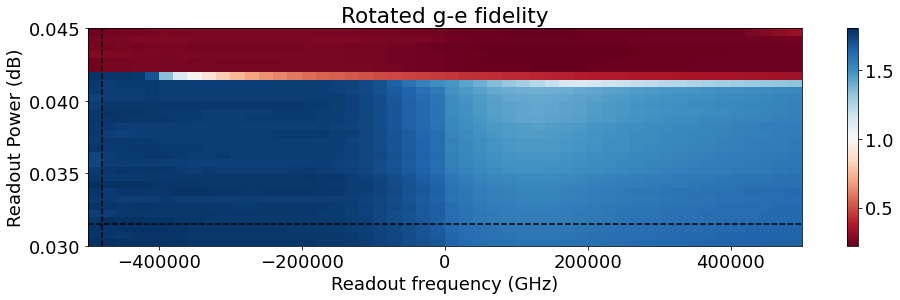

#############################################################################################
Optimal fidelity of 1.804488 at readout power = - 0.031500 dB and readout frequency = -480000.000000 GHz
#############################################################################################


In [10]:
fid_power = []
"""The sweep occurs in the following order: for a fixed readout frequency, the power is swept
    and then to next readout frequency. So, the data is arranged such that first len(attens) rows correspond to
    one readout frequency.  
    """
avgs = 3000

for ii in range(len(attens)):
        """Select all the rows corresponding to the same readout power"""
        ig, qg = Ig.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qg.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        ie, qe = Ie.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qe.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        fid_freq = []
#         print(len(ig), len(qe))
        """For the same readout power, compute the g|e fidelity corresponding to each readout frequency"""
        for jj in range(len(freqs)):
            a = ig.iloc[jj:(jj+1)*avgs]
            b = qg.iloc[jj:(jj+1)*avgs]
            c = ie.iloc[jj:(jj+1)*avgs]
            d = qe.iloc[jj:(jj+1)*avgs]

            """Compute the medians of each blob"""
            
            xg, yg = np.median(a), np.median(b)
            xe, ye = np.median(c), np.median(d)
            
            """Compute the rotation angle"""
            theta = -arctan((ye-yg)/(xe-xg))
            """Rotate the IQ data"""
            ig_new = a*cos(theta) - b*sin(theta)
            qg_new = a*sin(theta) + b*cos(theta) 
            ie_new = c*cos(theta) - d*sin(theta)
            qe_new = c*sin(theta) + d*cos(theta)
#             print(len(ig_new), len(qe_new))

            """New means of each blob"""
            xg, yg = np.median(ig_new), np.median(qg_new)
            xe, ye = np.median(ie_new), np.median(qe_new)
            """X and Y ranges for histogram"""
            xlims = [xg-ran/5, xg+ran/5]
            ylims = [yg-ran/5, yg+ran/5]
#             plt.scatter(ig_new, qg_new, 'bo')
#             plt.scatter(ie_new, qe_new, 'ro')
            
            ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
            ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)
            """Compute the fidelity using overlap of the histograms"""
            fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum()))).max()
            fid_freq.append(fid)
        
        fid_power.append(fid_freq)   
"""Row number corresponding to maximum fidelity"""
# fid_power = np.transpose(fid_power)
ind = np.argmax(fid_power)
# f_vec = freqs/1e9 + 0.5*(8.051828 + 8.051487)
f_vec = freqs
plt.figure(figsize=(16, 4))
plt.pcolormesh(f_vec, attens, fid_power, cmap='RdBu')
plt.xlabel('Readout frequency (GHz)')
plt.ylabel('Readout Power (dB)')
plt.title('Rotated g-e fidelity')
plt.colorbar()
plt.axvline(x=f_vec[ind%len(freqs)], color='k', linestyle='--')
plt.axhline(y=attens[ind//len(freqs)], color='k', linestyle='--')
# plt.axvline(x = 8.0514, color='r', linestyle='--')
# plt.axvline(x = 8.0518, color='b', linestyle='--')
plt.show()

print("#############################################################################################")
print('Optimal fidelity of %f at readout power = - %f dB and readout frequency = %f GHz'%(np.max(fid_power), attens[ind//len(freqs)],f_vec[ind%len(freqs)] ))
print("#############################################################################################")

# ind = ind%len(freqs)*len(attens) + ind//len(freqs)

# ig_opt, qg_opt = Ig.iloc[ind], Qg.iloc[ind]
# ie_opt, qe_opt = Ie.iloc[ind], Qe.iloc[ind]


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
# fig.tight_layout()
# fig.subplots_adjust(bottom=0.6, right=1.25, top=1.5)

# ax = axs[0, 0]
# ax.set_title('Unrotated')
# ax.scatter(ig_opt, qg_opt, label='g', alpha=0.25)
# ax.scatter(ie_opt, qe_opt, label='e', alpha=0.25)
# xg, yg = mean(ig_opt), mean(qg_opt)
# xe, ye = mean(ie_opt), mean(qe_opt)

# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)

# theta = -arctan((ye-yg)/(xe-xg))
# print("Rotation angle:   %.3f"%theta)

# ax = axs[0, 1]
# ax.set_title('Unrotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.legend(loc='best')
# ax.set_ylim(ylims[0], ylims[1])
# ax.set_xlim(xlims[0], xlims[1])


# ax = axs[1, 0]
# ax.set_title('Rotated')
# ig_new, qg_new = ig_opt*cos(theta)- qg_opt*sin(theta), ig_opt*sin(theta)+ qg_opt*cos(theta) 
# ie_new, qe_new = ie_opt*cos(theta)- qe_opt*sin(theta), ie_opt*sin(theta)+ qe_opt*cos(theta) 

# ax.scatter(ig_new, qg_new, label='g', alpha=0.25)
# ax.scatter(ie_new, qe_new, label='e', alpha=0.25)

# xg, yg = mean(ig_new), mean(qg_new)
# xe, ye = mean(ie_new), mean(qe_new)

# ax.errorbar(xg, yg, xerr=std(ig_new), yerr=std(qg_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_new), yerr=std(qe_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylim(ylims[0], ylims[1])

# ax.set_xlabel('I(V)')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)
# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])


# ax = axs[1, 1]
# ax.set_title('Rotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.set_xlabel('I(V)')
# ax.legend(loc='best')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims[0], ylims[1])
# plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
# ax = axs[0, 0]
# ax.set_title('I')
# xlims = [xg-ran/5, xg+ran/5]
# ng, binsg, p = ax.hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binsg[:-1], ydata=ng, p0=[1, 0.01, 0.02, 1, 0.01, 0.0])
# ax.plot(binsg, doublegauss(binsg, *popt), 'k--', linewidth=2 )
# ax.text(xg, 50, "$\mu_{g}$ = %.4f \n $\sigma_{g}$ = %.5f"%(popt[1], popt[2]))
# ax.set_ylabel('# of counts')

# ne, binse, p = ax.hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binse[:-1], ydata=ne, p0=[1, 0.01, -0.02, 1, 0.01, -0.01])
# ax.plot(binse, doublegauss(binse, *popt), 'k--', linewidth=2 )
# ax.text(xe, 150, "$\mu_{e}$ = %.4f \n $\sigma_{e}$ = %.5f"%(popt[4], popt[5]))
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax = axs[1, 0]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('I(V)')
# ax.set_ylabel('F')
# print("##################################################################################")
# print ("Single shot readout fidility from channel ", "I", " after rotation = ",fid)
# print ("Optimal angle =",theta)
# print("##################################################################################")

# ax = axs[0, 1]
# ax.set_title('Q')
# ylims  = [yg-ran/5, yg+ran/5]
# ng, binsg, p = ax.hist(qg_new, bins=numbins,range =ylims, color='b', label='g', alpha=0.5)
# ne, binse, p = ax.hist(qe_new, bins=numbins,range =ylims, color='r', label='e', alpha=0.5)
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax.set_xlabel('Q(V)')

# print ("Single shot readout fidility from channel ","Q"," after rotation = ",fid)
# ax = axs[1, 1]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('Q(V)')
# ax.set_ylabel('F')

# plt.show()

## 3.6us

In [33]:
filename = "C://_Lib/python//slab//experiments//qm_opx//data//histogram_amp_freq_sweep_100MHz_3.6us.h5"
numbins = 200
ran = 0.8
with File(filename,'r') as a:
        Ig = array(a['ig'])/ran
        Qg = array(a['qg'])/ran
        Ie = array(a['ie'])/ran
        Qe = array(a['qe'])/ran
        attens = array(a['att'])
        freqs = array(a['freq'])
        print(shape(Ig))
Ig = pd.DataFrame(Ig)
Qg = pd.DataFrame(Qg)
Ie = pd.DataFrame(Ie)
Qe = pd.DataFrame(Qe)

(8109000,)


C:\Users\slab\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


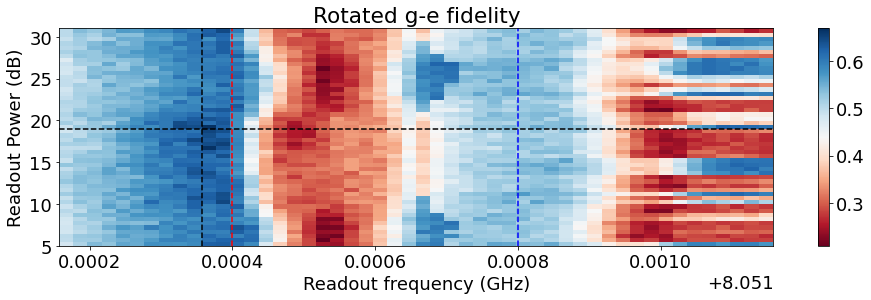

#############################################################################################
Optimal fidelity of 0.668563 at readout power = - 19.000000 dB and readout frequency = 8.051358 GHz
#############################################################################################


In [34]:
fid_power = []
"""The sweep occurs in the following order: for a fixed readout frequency, the power is swept
    and then to next readout frequency. So, the data is arranged such that first len(attens) rows correspond to
    one readout frequency.  
    """
avgs = 3000

for ii in range(len(attens)):
        """Select all the rows corresponding to the same readout power"""
        ig, qg = Ig.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qg.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        ie, qe = Ie.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qe.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        fid_freq = []
#         print(len(ig), len(qe))
        """For the same readout power, compute the g|e fidelity corresponding to each readout frequency"""
        for jj in range(len(freqs)):
            a = ig.iloc[jj::len(freqs)]
            b = qg.iloc[jj::len(freqs)]
            c = ie.iloc[jj::len(freqs)]
            d = qe.iloc[jj::len(freqs)]

            """Compute the medians of each blob"""
            
            xg, yg = np.median(a), np.median(b)
            xe, ye = np.median(c), np.median(d)
            
            """Compute the rotation angle"""
            theta = -arctan((ye-yg)/(xe-xg))
            """Rotate the IQ data"""
            ig_new = a*cos(theta) - b*sin(theta)
            qg_new = a*sin(theta) + b*cos(theta) 
            ie_new = c*cos(theta) - d*sin(theta)
            qe_new = c*sin(theta) + d*cos(theta)
#             print(len(ig_new), len(qe_new))

            """New means of each blob"""
            xg, yg = np.median(ig_new), np.median(qg_new)
            xe, ye = np.median(ie_new), np.median(qe_new)
            """X and Y ranges for histogram"""
            xlims = [xg-ran/5, xg+ran/5]
            ylims = [yg-ran/5, yg+ran/5]
#             plt.scatter(ig_new, qg_new, 'bo')
#             plt.scatter(ie_new, qe_new, 'ro')
            
            ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
            ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)
            """Compute the fidelity using overlap of the histograms"""
            fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum()))).max()
            fid_freq.append(fid)
        
        fid_power.append(fid_freq)   
"""Row number corresponding to maximum fidelity"""
# fid_power = np.transpose(fid_power)
ind = np.argmax(fid_power)
f_vec = freqs/1e9 + 0.5*(8.051828 + 8.051487)
plt.figure(figsize=(16, 4))
plt.pcolormesh(f_vec, attens, fid_power, cmap='RdBu')
plt.xlabel('Readout frequency (GHz)')
plt.ylabel('Readout Power (dB)')
plt.title('Rotated g-e fidelity')
plt.colorbar()
plt.axvline(x=f_vec[ind%len(freqs)], color='k', linestyle='--')
plt.axhline(y=attens[ind//len(freqs)], color='k', linestyle='--')
plt.axvline(x = 8.0514, color='r', linestyle='--')
plt.axvline(x = 8.0518, color='b', linestyle='--')
plt.show()

print("#############################################################################################")
print('Optimal fidelity of %f at readout power = - %f dB and readout frequency = %f GHz'%(np.max(fid_power), attens[ind//len(freqs)],f_vec[ind%len(freqs)] ))
print("#############################################################################################")

# ind = ind%len(freqs)*len(attens) + ind//len(freqs)

# ig_opt, qg_opt = Ig.iloc[ind], Qg.iloc[ind]
# ie_opt, qe_opt = Ie.iloc[ind], Qe.iloc[ind]


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
# fig.tight_layout()
# fig.subplots_adjust(bottom=0.6, right=1.25, top=1.5)

# ax = axs[0, 0]
# ax.set_title('Unrotated')
# ax.scatter(ig_opt, qg_opt, label='g', alpha=0.25)
# ax.scatter(ie_opt, qe_opt, label='e', alpha=0.25)
# xg, yg = mean(ig_opt), mean(qg_opt)
# xe, ye = mean(ie_opt), mean(qe_opt)

# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)

# theta = -arctan((ye-yg)/(xe-xg))
# print("Rotation angle:   %.3f"%theta)

# ax = axs[0, 1]
# ax.set_title('Unrotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.legend(loc='best')
# ax.set_ylim(ylims[0], ylims[1])
# ax.set_xlim(xlims[0], xlims[1])


# ax = axs[1, 0]
# ax.set_title('Rotated')
# ig_new, qg_new = ig_opt*cos(theta)- qg_opt*sin(theta), ig_opt*sin(theta)+ qg_opt*cos(theta) 
# ie_new, qe_new = ie_opt*cos(theta)- qe_opt*sin(theta), ie_opt*sin(theta)+ qe_opt*cos(theta) 

# ax.scatter(ig_new, qg_new, label='g', alpha=0.25)
# ax.scatter(ie_new, qe_new, label='e', alpha=0.25)

# xg, yg = mean(ig_new), mean(qg_new)
# xe, ye = mean(ie_new), mean(qe_new)

# ax.errorbar(xg, yg, xerr=std(ig_new), yerr=std(qg_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_new), yerr=std(qe_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylim(ylims[0], ylims[1])

# ax.set_xlabel('I(V)')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)
# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])


# ax = axs[1, 1]
# ax.set_title('Rotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.set_xlabel('I(V)')
# ax.legend(loc='best')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims[0], ylims[1])
# plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
# ax = axs[0, 0]
# ax.set_title('I')
# xlims = [xg-ran/5, xg+ran/5]
# ng, binsg, p = ax.hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binsg[:-1], ydata=ng, p0=[1, 0.01, 0.02, 1, 0.01, 0.0])
# ax.plot(binsg, doublegauss(binsg, *popt), 'k--', linewidth=2 )
# ax.text(xg, 50, "$\mu_{g}$ = %.4f \n $\sigma_{g}$ = %.5f"%(popt[1], popt[2]))
# ax.set_ylabel('# of counts')

# ne, binse, p = ax.hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binse[:-1], ydata=ne, p0=[1, 0.01, -0.02, 1, 0.01, -0.01])
# ax.plot(binse, doublegauss(binse, *popt), 'k--', linewidth=2 )
# ax.text(xe, 150, "$\mu_{e}$ = %.4f \n $\sigma_{e}$ = %.5f"%(popt[4], popt[5]))
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax = axs[1, 0]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('I(V)')
# ax.set_ylabel('F')
# print("##################################################################################")
# print ("Single shot readout fidility from channel ", "I", " after rotation = ",fid)
# print ("Optimal angle =",theta)
# print("##################################################################################")

# ax = axs[0, 1]
# ax.set_title('Q')
# ylims  = [yg-ran/5, yg+ran/5]
# ng, binsg, p = ax.hist(qg_new, bins=numbins,range =ylims, color='b', label='g', alpha=0.5)
# ne, binse, p = ax.hist(qe_new, bins=numbins,range =ylims, color='r', label='e', alpha=0.5)
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax.set_xlabel('Q(V)')

# print ("Single shot readout fidility from channel ","Q"," after rotation = ",fid)
# ax = axs[1, 1]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('Q(V)')
# ax.set_ylabel('F')

# plt.show()

## 3us

In [24]:
filename = "C://_Lib/python//slab//experiments//qm_opx//data//histogram_amp_freq_sweep_100MHz_3us.h5"
numbins = 200
ran = 0.8
with File(filename,'r') as a:
        Ig = array(a['ig'])/ran
        Qg = array(a['qg'])/ran
        Ie = array(a['ie'])/ran
        Qe = array(a['qe'])/ran
        attens = array(a['att'])
        freqs = array(a['freq'])
        print(shape(Ig))
Ig = pd.DataFrame(Ig)
Qg = pd.DataFrame(Qg)
Ie = pd.DataFrame(Ie)
Qe = pd.DataFrame(Qe)

(3813000,)


C:\Users\slab\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


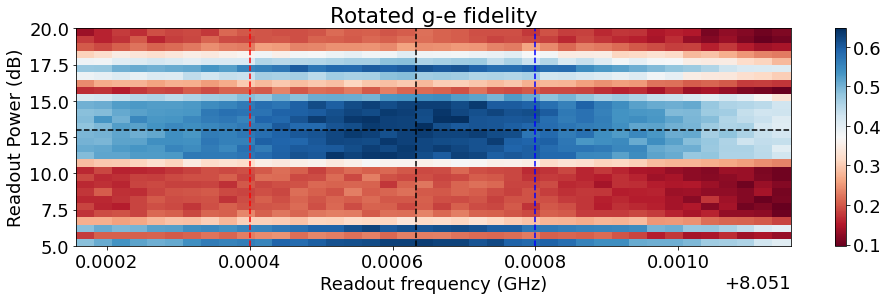

#############################################################################################
Optimal fidelity of 0.646667 at readout power = - 13.000000 dB and readout frequency = 8.051633 GHz
#############################################################################################


In [25]:
fid_power = []
"""The sweep occurs in the following order: for a fixed readout frequency, the power is swept
    and then to next readout frequency. So, the data is arranged such that first len(attens) rows correspond to
    one readout frequency.  
    """
avgs = 3000

for ii in range(len(attens)):
        """Select all the rows corresponding to the same readout power"""
        ig, qg = Ig.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qg.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        ie, qe = Ie.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qe.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        fid_freq = []
#         print(len(ig), len(qe))
        """For the same readout power, compute the g|e fidelity corresponding to each readout frequency"""
        for jj in range(len(freqs)):
            a = ig.iloc[jj::len(freqs)]
            b = qg.iloc[jj::len(freqs)]
            c = ie.iloc[jj::len(freqs)]
            d = qe.iloc[jj::len(freqs)]

            """Compute the medians of each blob"""
            
            xg, yg = np.median(a), np.median(b)
            xe, ye = np.median(c), np.median(d)
            
            """Compute the rotation angle"""
            theta = -arctan((ye-yg)/(xe-xg))
            """Rotate the IQ data"""
            ig_new = a*cos(theta) - b*sin(theta)
            qg_new = a*sin(theta) + b*cos(theta) 
            ie_new = c*cos(theta) - d*sin(theta)
            qe_new = c*sin(theta) + d*cos(theta)
#             print(len(ig_new), len(qe_new))

            """New means of each blob"""
            xg, yg = np.median(ig_new), np.median(qg_new)
            xe, ye = np.median(ie_new), np.median(qe_new)
            """X and Y ranges for histogram"""
            xlims = [xg-ran/5, xg+ran/5]
            ylims = [yg-ran/5, yg+ran/5]
#             plt.scatter(ig_new, qg_new, 'bo')
#             plt.scatter(ie_new, qe_new, 'ro')
            
            ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
            ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)
            """Compute the fidelity using overlap of the histograms"""
            fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum()))).max()
            fid_freq.append(fid)
        
        fid_power.append(fid_freq)   
"""Row number corresponding to maximum fidelity"""
# fid_power = np.transpose(fid_power)
ind = np.argmax(fid_power)
f_vec = freqs/1e9 + 0.5*(8.051828 + 8.051487)
plt.figure(figsize=(16, 4))
plt.pcolormesh(f_vec, attens, fid_power, cmap='RdBu')
plt.xlabel('Readout frequency (GHz)')
plt.ylabel('Readout Power (dB)')
plt.title('Rotated g-e fidelity')
plt.colorbar()
plt.axvline(x=f_vec[ind%len(freqs)], color='k', linestyle='--')
plt.axhline(y=attens[ind//len(freqs)], color='k', linestyle='--')
plt.axvline(x = 8.0514, color='r', linestyle='--')
plt.axvline(x = 8.0518, color='b', linestyle='--')
plt.show()

print("#############################################################################################")
print('Optimal fidelity of %f at readout power = - %f dB and readout frequency = %f GHz'%(np.max(fid_power), attens[ind//len(freqs)],f_vec[ind%len(freqs)] ))
print("#############################################################################################")

# ind = ind%len(freqs)*len(attens) + ind//len(freqs)

# ig_opt, qg_opt = Ig.iloc[ind], Qg.iloc[ind]
# ie_opt, qe_opt = Ie.iloc[ind], Qe.iloc[ind]


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
# fig.tight_layout()
# fig.subplots_adjust(bottom=0.6, right=1.25, top=1.5)

# ax = axs[0, 0]
# ax.set_title('Unrotated')
# ax.scatter(ig_opt, qg_opt, label='g', alpha=0.25)
# ax.scatter(ie_opt, qe_opt, label='e', alpha=0.25)
# xg, yg = mean(ig_opt), mean(qg_opt)
# xe, ye = mean(ie_opt), mean(qe_opt)

# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)

# theta = -arctan((ye-yg)/(xe-xg))
# print("Rotation angle:   %.3f"%theta)

# ax = axs[0, 1]
# ax.set_title('Unrotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.legend(loc='best')
# ax.set_ylim(ylims[0], ylims[1])
# ax.set_xlim(xlims[0], xlims[1])


# ax = axs[1, 0]
# ax.set_title('Rotated')
# ig_new, qg_new = ig_opt*cos(theta)- qg_opt*sin(theta), ig_opt*sin(theta)+ qg_opt*cos(theta) 
# ie_new, qe_new = ie_opt*cos(theta)- qe_opt*sin(theta), ie_opt*sin(theta)+ qe_opt*cos(theta) 

# ax.scatter(ig_new, qg_new, label='g', alpha=0.25)
# ax.scatter(ie_new, qe_new, label='e', alpha=0.25)

# xg, yg = mean(ig_new), mean(qg_new)
# xe, ye = mean(ie_new), mean(qe_new)

# ax.errorbar(xg, yg, xerr=std(ig_new), yerr=std(qg_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_new), yerr=std(qe_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylim(ylims[0], ylims[1])

# ax.set_xlabel('I(V)')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)
# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])


# ax = axs[1, 1]
# ax.set_title('Rotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.set_xlabel('I(V)')
# ax.legend(loc='best')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims[0], ylims[1])
# plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
# ax = axs[0, 0]
# ax.set_title('I')
# xlims = [xg-ran/5, xg+ran/5]
# ng, binsg, p = ax.hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binsg[:-1], ydata=ng, p0=[1, 0.01, 0.02, 1, 0.01, 0.0])
# ax.plot(binsg, doublegauss(binsg, *popt), 'k--', linewidth=2 )
# ax.text(xg, 50, "$\mu_{g}$ = %.4f \n $\sigma_{g}$ = %.5f"%(popt[1], popt[2]))
# ax.set_ylabel('# of counts')

# ne, binse, p = ax.hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binse[:-1], ydata=ne, p0=[1, 0.01, -0.02, 1, 0.01, -0.01])
# ax.plot(binse, doublegauss(binse, *popt), 'k--', linewidth=2 )
# ax.text(xe, 150, "$\mu_{e}$ = %.4f \n $\sigma_{e}$ = %.5f"%(popt[4], popt[5]))
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax = axs[1, 0]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('I(V)')
# ax.set_ylabel('F')
# print("##################################################################################")
# print ("Single shot readout fidility from channel ", "I", " after rotation = ",fid)
# print ("Optimal angle =",theta)
# print("##################################################################################")

# ax = axs[0, 1]
# ax.set_title('Q')
# ylims  = [yg-ran/5, yg+ran/5]
# ng, binsg, p = ax.hist(qg_new, bins=numbins,range =ylims, color='b', label='g', alpha=0.5)
# ne, binse, p = ax.hist(qe_new, bins=numbins,range =ylims, color='r', label='e', alpha=0.5)
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax.set_xlabel('Q(V)')

# print ("Single shot readout fidility from channel ","Q"," after rotation = ",fid)
# ax = axs[1, 1]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('Q(V)')
# ax.set_ylabel('F')

# plt.show()

## 1us

In [35]:
filename = "C://_Lib/python//slab//experiments//qm_opx//data//histogram_amp_freq_sweep_100MHz_1us.h5"
numbins = 200
ran = 0.8
with File(filename,'r') as a:
        Ig = array(a['ig'])/ran
        Qg = array(a['qg'])/ran
        Ie = array(a['ie'])/ran
        Qe = array(a['qe'])/ran
        attens = array(a['att'])
        freqs = array(a['freq'])
        print(shape(Ig))
Ig = pd.DataFrame(Ig)
Qg = pd.DataFrame(Qg)
Ie = pd.DataFrame(Ie)
Qe = pd.DataFrame(Qe)

(891000,)


C:\Users\slab\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


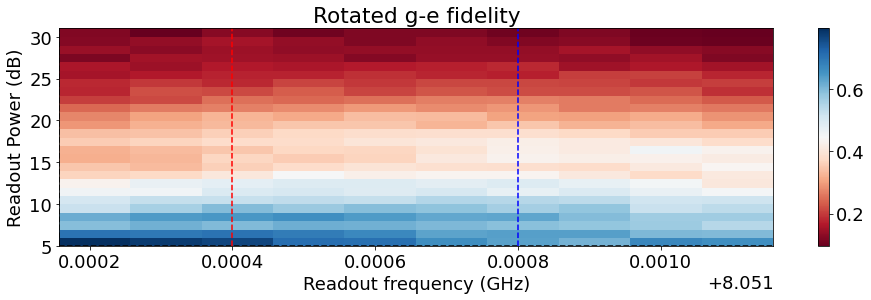

#############################################################################################
Optimal fidelity of 0.795667 at readout power = - 5.000000 dB and readout frequency = 8.051158 GHz
#############################################################################################


In [36]:
fid_power = []
"""The sweep occurs in the following order: for a fixed readout frequency, the power is swept
    and then to next readout frequency. So, the data is arranged such that first len(attens) rows correspond to
    one readout frequency.  
    """
avgs = 3000

for ii in range(len(attens)):
        """Select all the rows corresponding to the same readout power"""
        ig, qg = Ig.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qg.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        ie, qe = Ie.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qe.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        fid_freq = []
#         print(len(ig), len(qe))
        """For the same readout power, compute the g|e fidelity corresponding to each readout frequency"""
        for jj in range(len(freqs)):
            a = ig.iloc[jj::len(freqs)]
            b = qg.iloc[jj::len(freqs)]
            c = ie.iloc[jj::len(freqs)]
            d = qe.iloc[jj::len(freqs)]

            """Compute the medians of each blob"""
            
            xg, yg = np.median(a), np.median(b)
            xe, ye = np.median(c), np.median(d)
            
            """Compute the rotation angle"""
            theta = -arctan((ye-yg)/(xe-xg))
            """Rotate the IQ data"""
            ig_new = a*cos(theta) - b*sin(theta)
            qg_new = a*sin(theta) + b*cos(theta) 
            ie_new = c*cos(theta) - d*sin(theta)
            qe_new = c*sin(theta) + d*cos(theta)
#             print(len(ig_new), len(qe_new))

            """New means of each blob"""
            xg, yg = np.median(ig_new), np.median(qg_new)
            xe, ye = np.median(ie_new), np.median(qe_new)
            """X and Y ranges for histogram"""
            xlims = [xg-ran/5, xg+ran/5]
            ylims = [yg-ran/5, yg+ran/5]
#             plt.scatter(ig_new, qg_new, 'bo')
#             plt.scatter(ie_new, qe_new, 'ro')
            
            ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
            ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)
            """Compute the fidelity using overlap of the histograms"""
            fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum()))).max()
            fid_freq.append(fid)
        
        fid_power.append(fid_freq)   
"""Row number corresponding to maximum fidelity"""
# fid_power = np.transpose(fid_power)
ind = np.argmax(fid_power)
f_vec = freqs/1e9 + 0.5*(8.051828 + 8.051487)
plt.figure(figsize=(16, 4))
plt.pcolormesh(f_vec, attens, fid_power, cmap='RdBu')
plt.xlabel('Readout frequency (GHz)')
plt.ylabel('Readout Power (dB)')
plt.title('Rotated g-e fidelity')
plt.colorbar()
plt.axvline(x=f_vec[ind%len(freqs)], color='k', linestyle='--')
plt.axhline(y=attens[ind//len(freqs)], color='k', linestyle='--')
plt.axvline(x = 8.0514, color='r', linestyle='--')
plt.axvline(x = 8.0518, color='b', linestyle='--')
plt.show()

print("#############################################################################################")
print('Optimal fidelity of %f at readout power = - %f dB and readout frequency = %f GHz'%(np.max(fid_power), attens[ind//len(freqs)],f_vec[ind%len(freqs)] ))
print("#############################################################################################")

# ind = ind%len(freqs)*len(attens) + ind//len(freqs)

# ig_opt, qg_opt = Ig.iloc[ind], Qg.iloc[ind]
# ie_opt, qe_opt = Ie.iloc[ind], Qe.iloc[ind]


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
# fig.tight_layout()
# fig.subplots_adjust(bottom=0.6, right=1.25, top=1.5)

# ax = axs[0, 0]
# ax.set_title('Unrotated')
# ax.scatter(ig_opt, qg_opt, label='g', alpha=0.25)
# ax.scatter(ie_opt, qe_opt, label='e', alpha=0.25)
# xg, yg = mean(ig_opt), mean(qg_opt)
# xe, ye = mean(ie_opt), mean(qe_opt)

# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)

# theta = -arctan((ye-yg)/(xe-xg))
# print("Rotation angle:   %.3f"%theta)

# ax = axs[0, 1]
# ax.set_title('Unrotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.legend(loc='best')
# ax.set_ylim(ylims[0], ylims[1])
# ax.set_xlim(xlims[0], xlims[1])


# ax = axs[1, 0]
# ax.set_title('Rotated')
# ig_new, qg_new = ig_opt*cos(theta)- qg_opt*sin(theta), ig_opt*sin(theta)+ qg_opt*cos(theta) 
# ie_new, qe_new = ie_opt*cos(theta)- qe_opt*sin(theta), ie_opt*sin(theta)+ qe_opt*cos(theta) 

# ax.scatter(ig_new, qg_new, label='g', alpha=0.25)
# ax.scatter(ie_new, qe_new, label='e', alpha=0.25)

# xg, yg = mean(ig_new), mean(qg_new)
# xe, ye = mean(ie_new), mean(qe_new)

# ax.errorbar(xg, yg, xerr=std(ig_new), yerr=std(qg_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_new), yerr=std(qe_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylim(ylims[0], ylims[1])

# ax.set_xlabel('I(V)')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)
# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])


# ax = axs[1, 1]
# ax.set_title('Rotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.set_xlabel('I(V)')
# ax.legend(loc='best')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims[0], ylims[1])
# plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
# ax = axs[0, 0]
# ax.set_title('I')
# xlims = [xg-ran/5, xg+ran/5]
# ng, binsg, p = ax.hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binsg[:-1], ydata=ng, p0=[1, 0.01, 0.02, 1, 0.01, 0.0])
# ax.plot(binsg, doublegauss(binsg, *popt), 'k--', linewidth=2 )
# ax.text(xg, 50, "$\mu_{g}$ = %.4f \n $\sigma_{g}$ = %.5f"%(popt[1], popt[2]))
# ax.set_ylabel('# of counts')

# ne, binse, p = ax.hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binse[:-1], ydata=ne, p0=[1, 0.01, -0.02, 1, 0.01, -0.01])
# ax.plot(binse, doublegauss(binse, *popt), 'k--', linewidth=2 )
# ax.text(xe, 150, "$\mu_{e}$ = %.4f \n $\sigma_{e}$ = %.5f"%(popt[4], popt[5]))
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax = axs[1, 0]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('I(V)')
# ax.set_ylabel('F')
# print("##################################################################################")
# print ("Single shot readout fidility from channel ", "I", " after rotation = ",fid)
# print ("Optimal angle =",theta)
# print("##################################################################################")

# ax = axs[0, 1]
# ax.set_title('Q')
# ylims  = [yg-ran/5, yg+ran/5]
# ng, binsg, p = ax.hist(qg_new, bins=numbins,range =ylims, color='b', label='g', alpha=0.5)
# ne, binse, p = ax.hist(qe_new, bins=numbins,range =ylims, color='r', label='e', alpha=0.5)
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax.set_xlabel('Q(V)')

# print ("Single shot readout fidility from channel ","Q"," after rotation = ",fid)
# ax = axs[1, 1]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('Q(V)')
# ax.set_ylabel('F')

# plt.show()

In [51]:
1-np.exp(-3.6/110)

0.03219753027224237

In [19]:
#FWHM of a Gaussian pulse
4*np.log10(2)/4

0.3010299956639812

In [21]:
32/np.sqrt(3.5*1e-3)

540.8987230262507

# 95 MHz IF

In [30]:
filename = "C://_Lib/python//slab//experiments//qm_opx//data//histogram_amp_freq_sweep_95MHz.h5"
numbins = 200
ran = 0.8
with File(filename,'r') as a:
        Ig = array(a['ig'])/ran
        Qg = array(a['qg'])/ran
        Ie = array(a['ie'])/ran
        Qe = array(a['qe'])/ran
        attens = array(a['att'])
        freqs = array(a['freq'])
        print(shape(Ig))
Ig = pd.DataFrame(Ig)
Qg = pd.DataFrame(Qg)
Ie = pd.DataFrame(Ie)
Qe = pd.DataFrame(Qe)

(2542000,)


C:\Users\slab\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


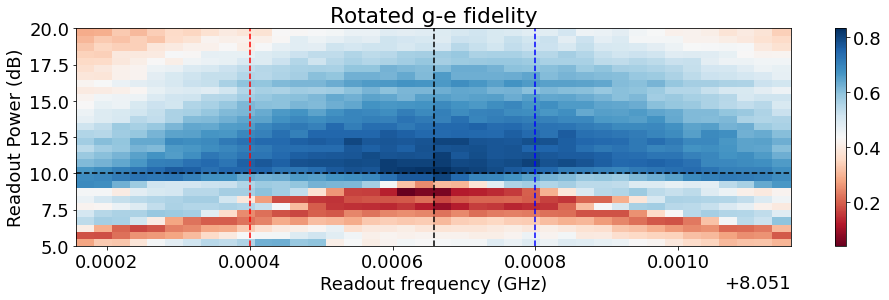

#############################################################################################
Optimal fidelity of 0.831539 at readout power = - 10.000000 dB and readout frequency = 8.051658 GHz
#############################################################################################


In [36]:
fid_power = []
"""The sweep occurs in the following order: for a fixed readout frequency, the power is swept
    and then to next readout frequency. So, the data is arranged such that first len(attens) rows correspond to
    one readout frequency.  
    """
avgs = 2000

for ii in range(len(attens)):
        """Select all the rows corresponding to the same readout power"""
        ig, qg = Ig.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qg.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        ie, qe = Ie.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs], Qe.iloc[ii*len(freqs)*avgs: (ii+1)*len(freqs)*avgs]
        fid_freq = []
#         print(len(ig), len(qe))
        """For the same readout power, compute the g|e fidelity corresponding to each readout frequency"""
        for jj in range(len(freqs)):
            a = ig.iloc[jj::len(freqs)]
            b = qg.iloc[jj::len(freqs)]
            c = ie.iloc[jj::len(freqs)]
            d = qe.iloc[jj::len(freqs)]

            """Compute the medians of each blob"""
            
            xg, yg = np.median(a), np.median(b)
            xe, ye = np.median(c), np.median(d)
            
            """Compute the rotation angle"""
            theta = -arctan((ye-yg)/(xe-xg))
            """Rotate the IQ data"""
            ig_new = a*cos(theta) - b*sin(theta)
            qg_new = a*sin(theta) + b*cos(theta) 
            ie_new = c*cos(theta) - d*sin(theta)
            qe_new = c*sin(theta) + d*cos(theta)
#             print(len(ig_new), len(qe_new))

            """New means of each blob"""
            xg, yg = np.median(ig_new), np.median(qg_new)
            xe, ye = np.median(ie_new), np.median(qe_new)
            """X and Y ranges for histogram"""
            xlims = [xg-ran/5, xg+ran/5]
            ylims = [yg-ran/5, yg+ran/5]
#             plt.scatter(ig_new, qg_new, 'bo')
#             plt.scatter(ie_new, qe_new, 'ro')
            
            ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
            ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)
            """Compute the fidelity using overlap of the histograms"""
            fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum()))).max()
            fid_freq.append(fid)
        
        fid_power.append(fid_freq)   
"""Row number corresponding to maximum fidelity"""
# fid_power = np.transpose(fid_power)
ind = np.argmax(fid_power)
f_vec = freqs/1e9 + 0.5*(8.051828 + 8.051487)
plt.figure(figsize=(16, 4))
plt.pcolormesh(f_vec, attens, fid_power, cmap='RdBu')
plt.xlabel('Readout frequency (GHz)')
plt.ylabel('Readout Power (dB)')
plt.title('Rotated g-e fidelity')
plt.colorbar()
plt.axvline(x=f_vec[ind%len(freqs)], color='k', linestyle='--')
plt.axhline(y=attens[ind//len(freqs)], color='k', linestyle='--')
plt.axvline(x = 8.0514, color='r', linestyle='--')
plt.axvline(x = 8.0518, color='b', linestyle='--')
plt.show()

print("#############################################################################################")
print('Optimal fidelity of %f at readout power = - %f dB and readout frequency = %f GHz'%(np.max(fid_power), attens[ind//len(freqs)],f_vec[ind%len(freqs)] ))
print("#############################################################################################")

# ind = ind%len(freqs)*len(attens) + ind//len(freqs)

# ig_opt, qg_opt = Ig.iloc[ind], Qg.iloc[ind]
# ie_opt, qe_opt = Ie.iloc[ind], Qe.iloc[ind]


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
# fig.tight_layout()
# fig.subplots_adjust(bottom=0.6, right=1.25, top=1.5)

# ax = axs[0, 0]
# ax.set_title('Unrotated')
# ax.scatter(ig_opt, qg_opt, label='g', alpha=0.25)
# ax.scatter(ie_opt, qe_opt, label='e', alpha=0.25)
# xg, yg = mean(ig_opt), mean(qg_opt)
# xe, ye = mean(ie_opt), mean(qe_opt)

# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)

# theta = -arctan((ye-yg)/(xe-xg))
# print("Rotation angle:   %.3f"%theta)

# ax = axs[0, 1]
# ax.set_title('Unrotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.legend(loc='best')
# ax.set_ylim(ylims[0], ylims[1])
# ax.set_xlim(xlims[0], xlims[1])


# ax = axs[1, 0]
# ax.set_title('Rotated')
# ig_new, qg_new = ig_opt*cos(theta)- qg_opt*sin(theta), ig_opt*sin(theta)+ qg_opt*cos(theta) 
# ie_new, qe_new = ie_opt*cos(theta)- qe_opt*sin(theta), ie_opt*sin(theta)+ qe_opt*cos(theta) 

# ax.scatter(ig_new, qg_new, label='g', alpha=0.25)
# ax.scatter(ie_new, qe_new, label='e', alpha=0.25)

# xg, yg = mean(ig_new), mean(qg_new)
# xe, ye = mean(ie_new), mean(qe_new)

# ax.errorbar(xg, yg, xerr=std(ig_new), yerr=std(qg_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.errorbar(xe, ye, xerr=std(ie_new), yerr=std(qe_new), fmt='o', capthick=4, 
#             markerfacecolor='#003f5c', markeredgecolor='k', ecolor='#003f5c')
# ax.set_ylim(ylims[0], ylims[1])

# ax.set_xlabel('I(V)')
# ax.set_ylabel('Q(V)')
# ax.legend(loc='best', fontsize=16)
# xlims = [xg-ran/5, xg+ran/5]
# ax.set_xlim(xlims[0], xlims[1])
# ylims = [yg-ran/5, yg+ran/5]
# ax.set_ylim(ylims[0], ylims[1])


# ax = axs[1, 1]
# ax.set_title('Rotated')
# ax.scatter(xg, yg, label='g', color='b', alpha=0.25)
# ax.scatter(xe, ye, label='e', color='r', alpha=0.25)
# ax.errorbar(xg, yg, xerr=std(ig_opt), yerr=std(qg_opt), fmt='o', capthick=4, 
#             markerfacecolor='b', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.errorbar(xe, ye, xerr=std(ie_opt), yerr=std(qe_opt), fmt='o', capthick=4, 
#             markerfacecolor='r', markeredgecolor='k', ecolor='#003f5c', alpha=0.25)
# ax.set_xlabel('I(V)')
# ax.legend(loc='best')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims[0], ylims[1])
# plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
# ax = axs[0, 0]
# ax.set_title('I')
# xlims = [xg-ran/5, xg+ran/5]
# ng, binsg, p = ax.hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binsg[:-1], ydata=ng, p0=[1, 0.01, 0.02, 1, 0.01, 0.0])
# ax.plot(binsg, doublegauss(binsg, *popt), 'k--', linewidth=2 )
# ax.text(xg, 50, "$\mu_{g}$ = %.4f \n $\sigma_{g}$ = %.5f"%(popt[1], popt[2]))
# ax.set_ylabel('# of counts')

# ne, binse, p = ax.hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
# popt, pcov = curve_fit(doublegauss, xdata=binse[:-1], ydata=ne, p0=[1, 0.01, -0.02, 1, 0.01, -0.01])
# ax.plot(binse, doublegauss(binse, *popt), 'k--', linewidth=2 )
# ax.text(xe, 150, "$\mu_{e}$ = %.4f \n $\sigma_{e}$ = %.5f"%(popt[4], popt[5]))
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax = axs[1, 0]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('I(V)')
# ax.set_ylabel('F')
# print("##################################################################################")
# print ("Single shot readout fidility from channel ", "I", " after rotation = ",fid)
# print ("Optimal angle =",theta)
# print("##################################################################################")

# ax = axs[0, 1]
# ax.set_title('Q')
# ylims  = [yg-ran/5, yg+ran/5]
# ng, binsg, p = ax.hist(qg_new, bins=numbins,range =ylims, color='b', label='g', alpha=0.5)
# ne, binse, p = ax.hist(qe_new, bins=numbins,range =ylims, color='r', label='e', alpha=0.5)
# fid = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / ng.sum())).max()
# ax.legend(loc='best')
# ax.set_xlabel('Q(V)')

# print ("Single shot readout fidility from channel ","Q"," after rotation = ",fid)
# ax = axs[1, 1]
# ax.plot(binse[:-1],cumsum(ng)/ng.sum(),color='r')
# ax.plot(binse[:-1],cumsum(ne)/ng.sum(),color='b')
# ax.plot(binse[:-1],np.abs(cumsum(ne)-cumsum(ng))/ng.sum(),color='k')
# ax.set_xlabel('Q(V)')
# ax.set_ylabel('F')

# plt.show()

In [32]:
np.max(fid_power)

0.8315394242803504

# Ramsey sweeps

In [122]:
path = "S:\\Morgan\\qm_opx\\morgan\\data\\"
filename = path + "square_pulse_ramsey_buffer.h5"
with File(filename, 'r') as f:
    I = pd.DataFrame(np.array(f["I"])) #converting voltage to Vpp
    Q = pd.DataFrame(np.array(f["Q"]))
    wait_times = 4*np.array(f["wait_time"])/1e3 #in μs
    ramsey_times = 4*np.array(f["ramsey_times"])/1e3
print(np.shape(I), len(wait_times))

(31, 31) 31


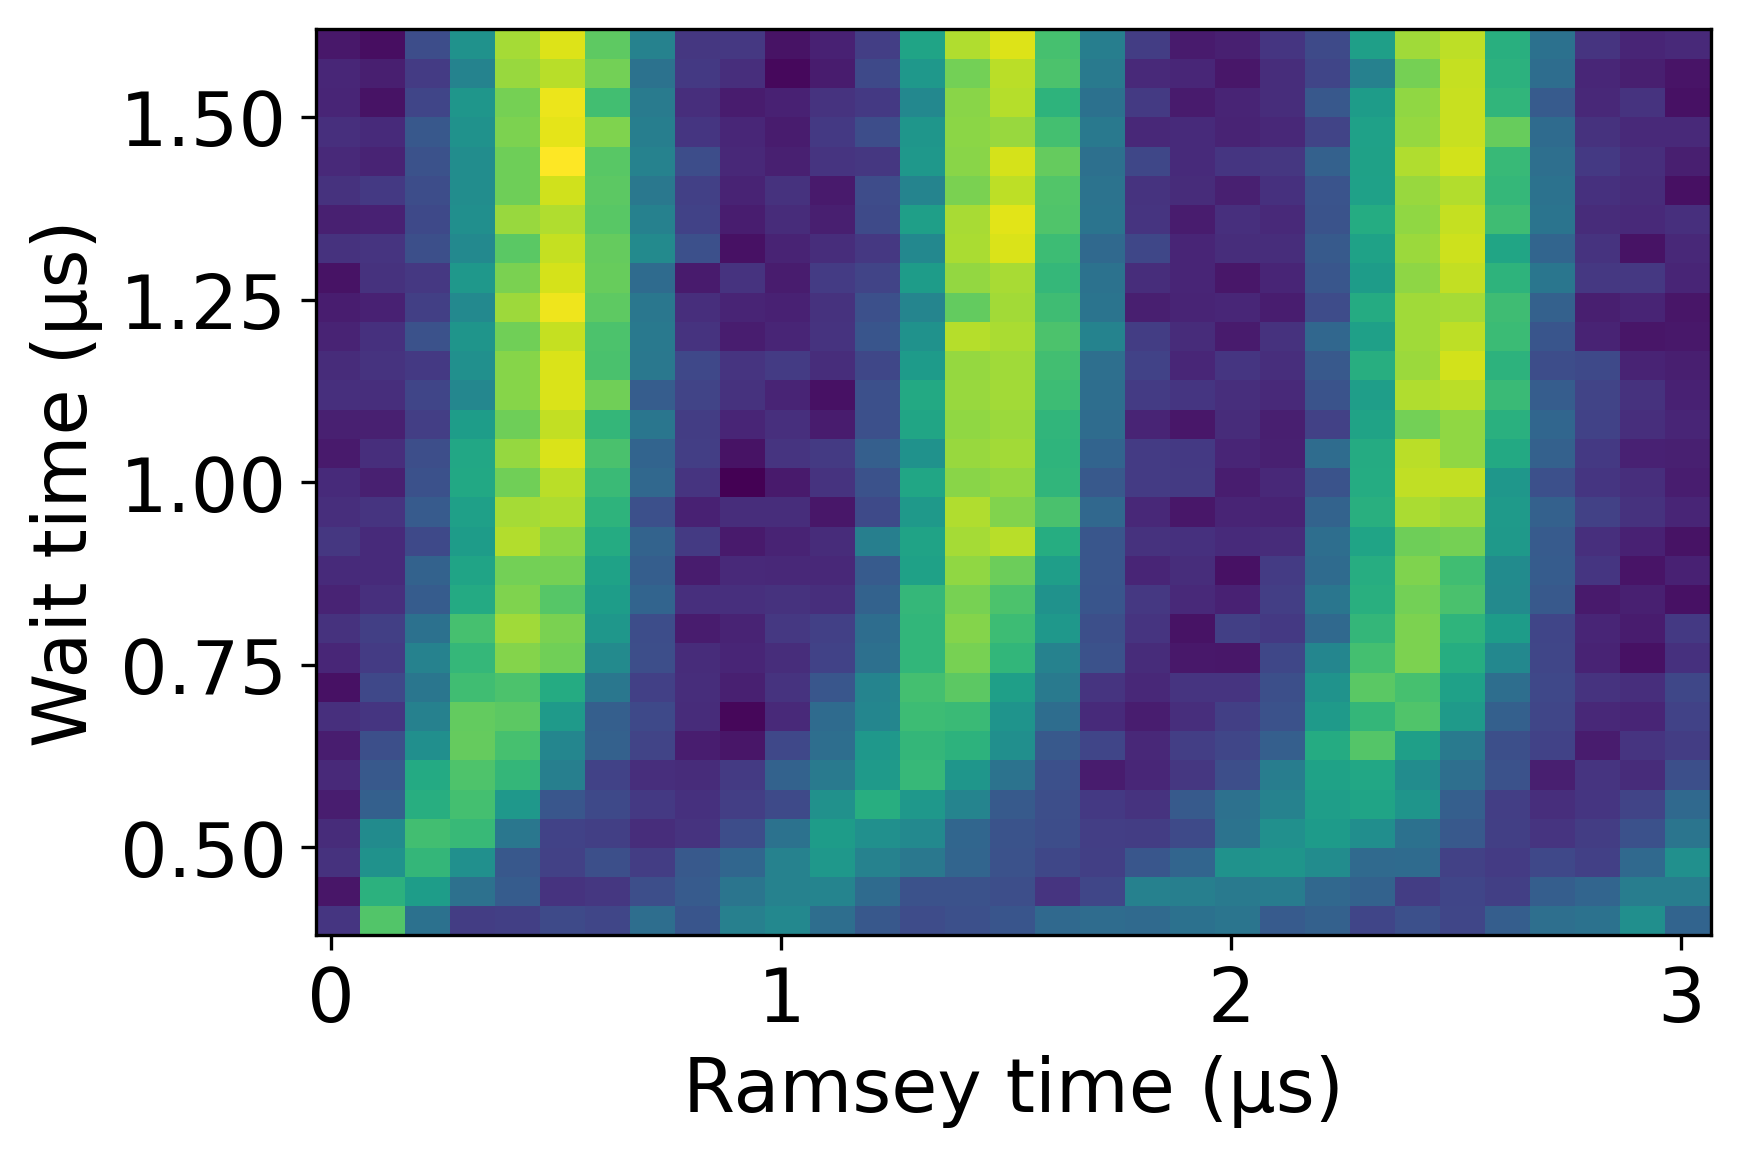

In [123]:
amps = np.sqrt(I**2 + Q**2)
plt.figure(dpi=300)
plt.pcolormesh(np.array(ramsey_times), np.array(wait_times), amps, shading='auto')
plt.xlabel('Ramsey time (μs)')
plt.ylabel('Wait time (μs)')
plt.show()

In [115]:
nx, ny = np.shape(I)
t2 = []
for j in range(nx):
    a = amps.iloc[j]
    p = fitdecaysin(ramsey_times, a, showfit=False)
    t2.append(p[3])

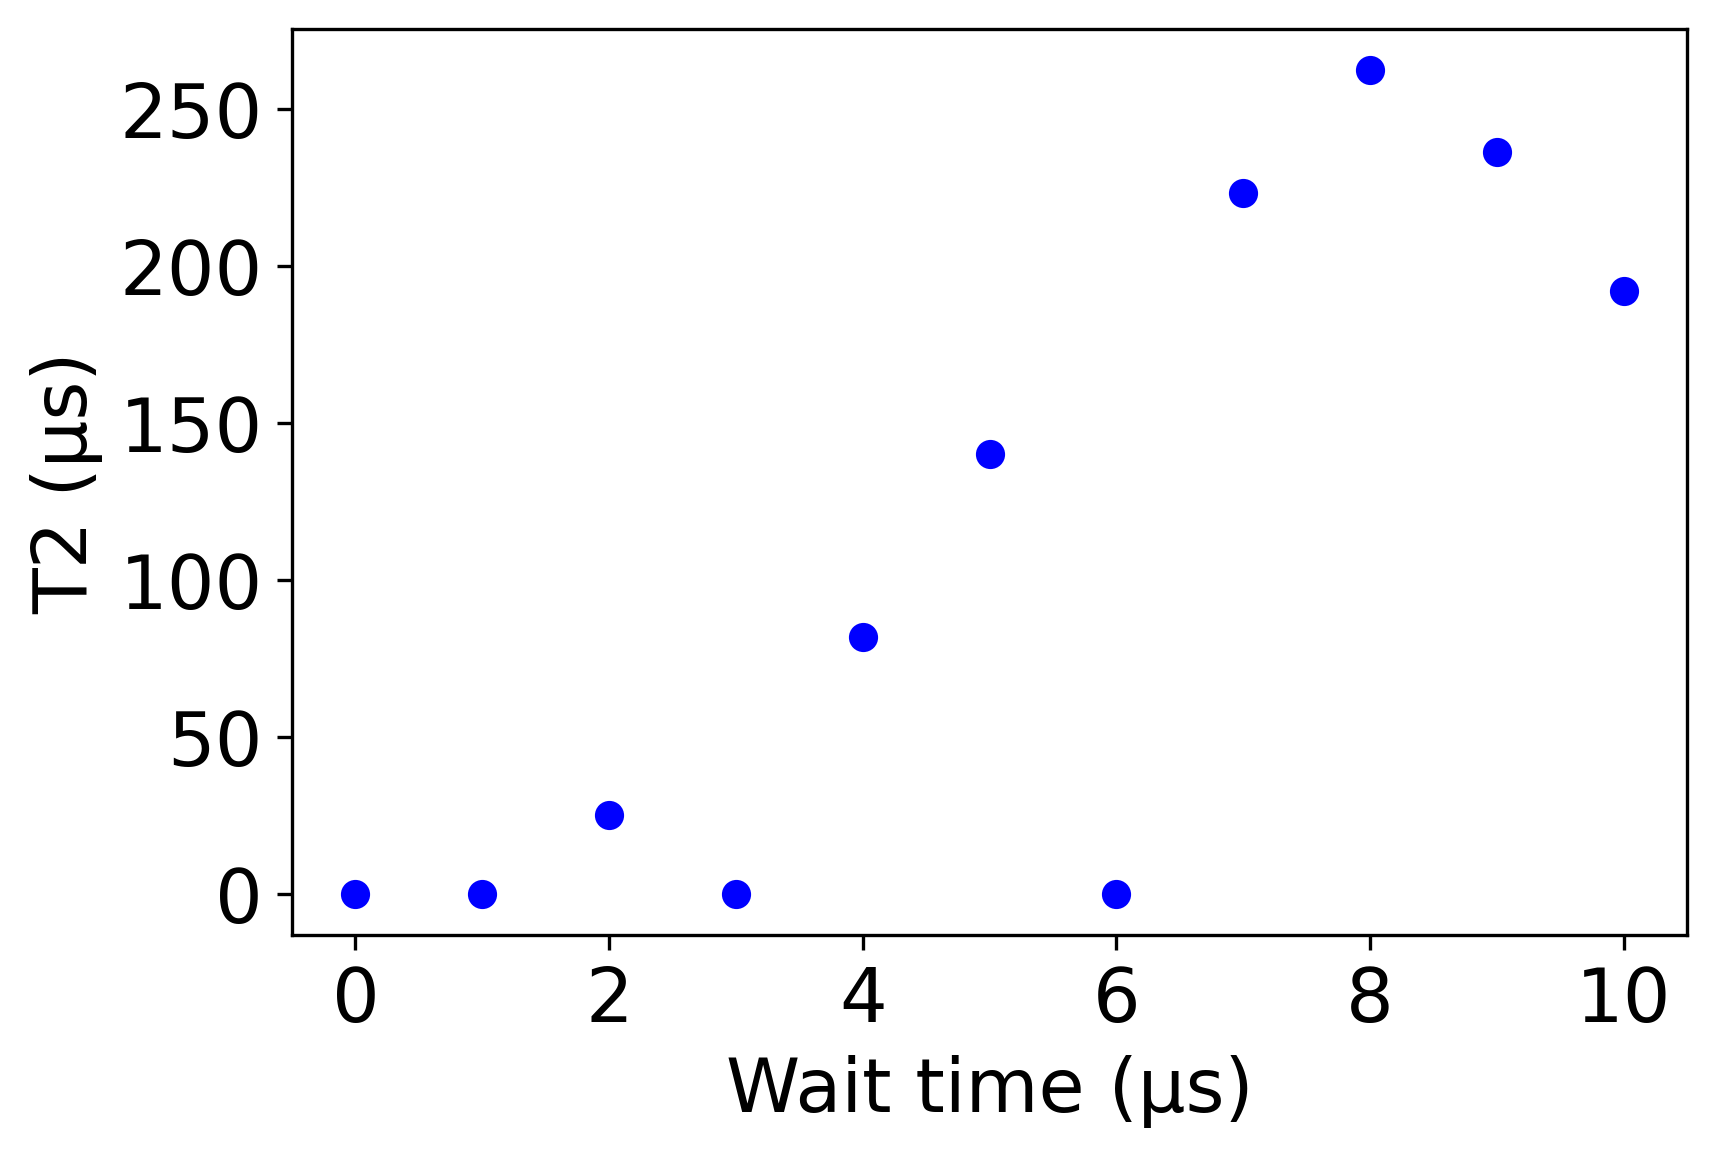

In [117]:
plt.figure(dpi=300)
plt.plot(t2, 'bo')
plt.xlabel('Wait time (μs)')
plt.ylabel('T2 (μs)')
plt.show()